# Graphics Configuration

## Rearranging Polygons

In [2]:
from flatsurf import *
from flatsurf.geometry.polyhedra import *

In [3]:
s = platonic_dodecahedron()[1]

The default way plotting looks:

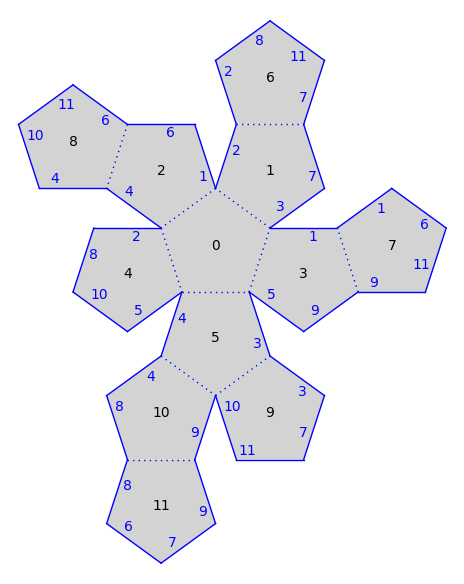

In [4]:
s.plot()

Labels in the center of each polygon indicate the label of the polygon. Edge labels above indicate which polygon the edge is glued to.

Plotting the surface is controlled by a GraphicalSurface object. You can get the surface as follows:

In [5]:
gs = s.graphical_surface()

The graphical surface controls where polygons are drawn. You can glue a polygon across an edge using `gs.make_adjacent(label,edge)`. A difficulty is that you need to know which edge is which. You can enable `zero_flags` to see the zero vertex of each polygon.

In [6]:
gs.will_plot_zero_flags = True

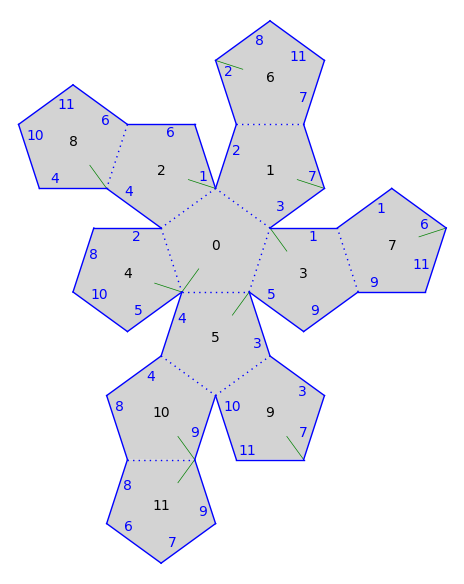

In [7]:
gs.plot()

FlatSurf just uses some simple algorithm to layout polygons. Sometimes they overlap for example. I'm troubled by that the picture is asymmetric: Polygon 4 should have a pentagon 10 sticking to it. We can see by counting counterclockwise from the red flag in polygon 4 that the 10 appears on edge 3. We can verify that with:

In [8]:
s.opposite_edge(4,3)

(10, 2)

We can move polygon 10 so that it is adjacent to polygon 4 with the command:

In [9]:
gs.make_adjacent(4,3)

Lets check that it worked:

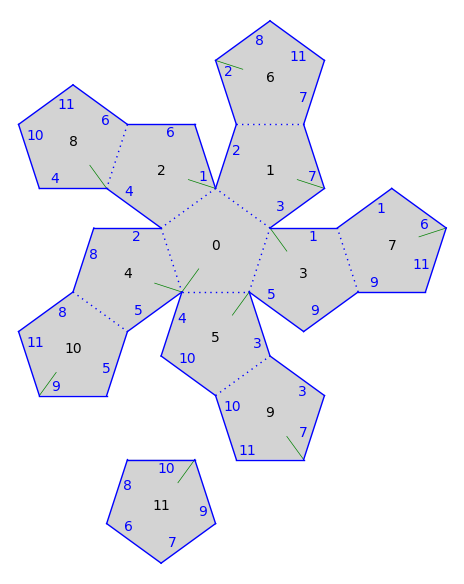

In [10]:
s.plot()

Oops. Lets also move polygon 11.

In [11]:
gs.make_adjacent(7,4)

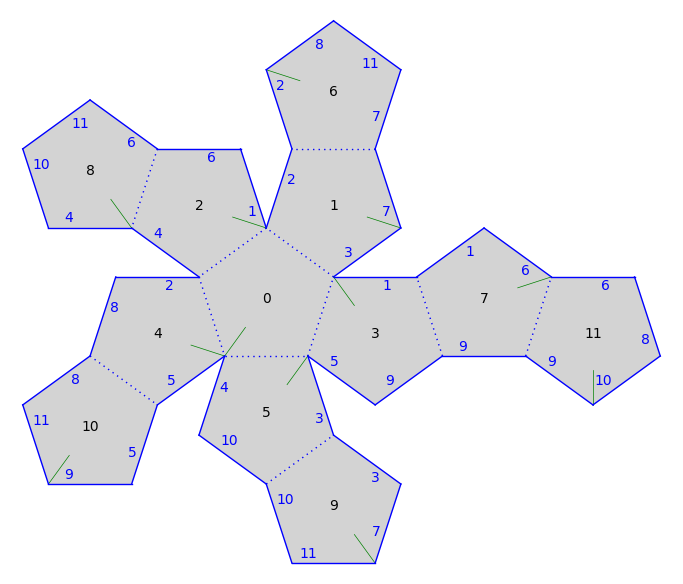

In [12]:
gs.plot()

There are other options which can change what is displayed on an edge. The option can also be passed to `s.graphical_surface()`.

In [19]:
gs.process_options(edge_labels="gluings and number")

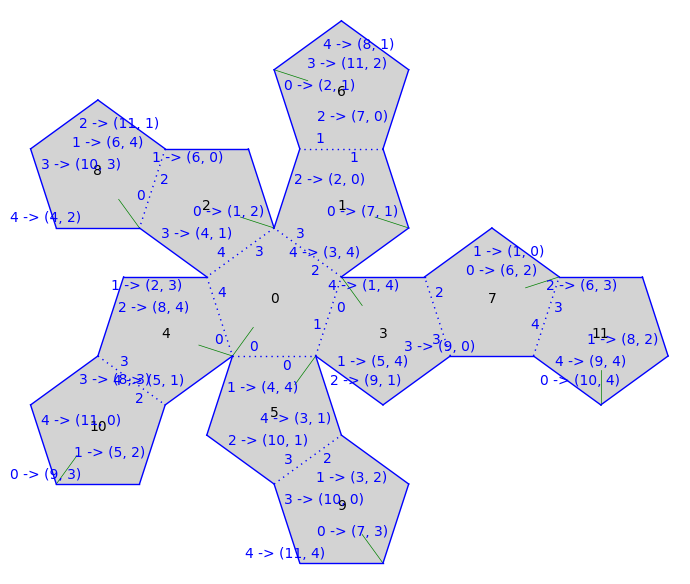

In [21]:
gs.plot()

In [22]:
gs.process_options(edge_labels="number")

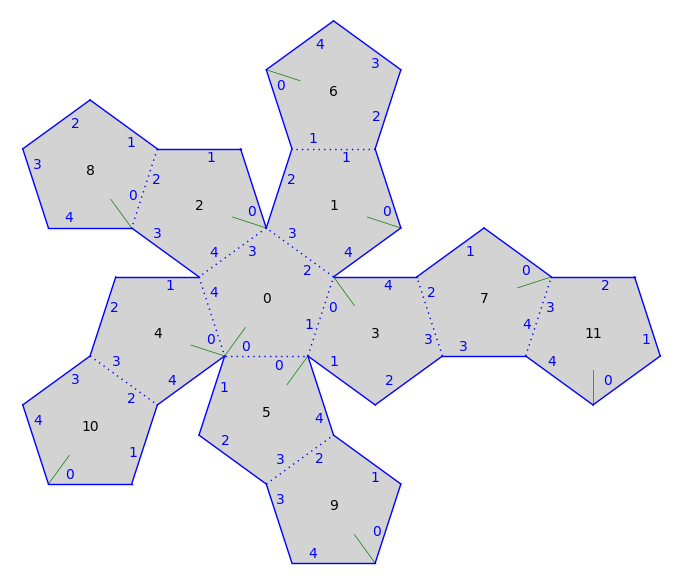

In [23]:
gs.plot()

## Moving between coordinate systems

The Euclidean Cone Surface `s` works in a different coordinate system then the graphical surface `gs`. So, when we moved the polygon above, we had no affect on `s`. In fact, the polygons of `s` are all the same:

In [12]:
s.polygon(0)

Polygon: (0, 0), (2, 0), (a^2 - 1, -a), (1, -a^3 + 2*a), (-a^2 + 3, -a)

In [13]:
s.polygon(1)

Polygon: (0, 0), (2, 0), (a^2 - 1, -a), (1, -a^3 + 2*a), (-a^2 + 3, -a)

So really `s` is a disjoint union of twelve copies of a standard pentagon with some edge gluings.

Lets now look at "graphical coordinates" i.e., the coordinates in which `gs` works.

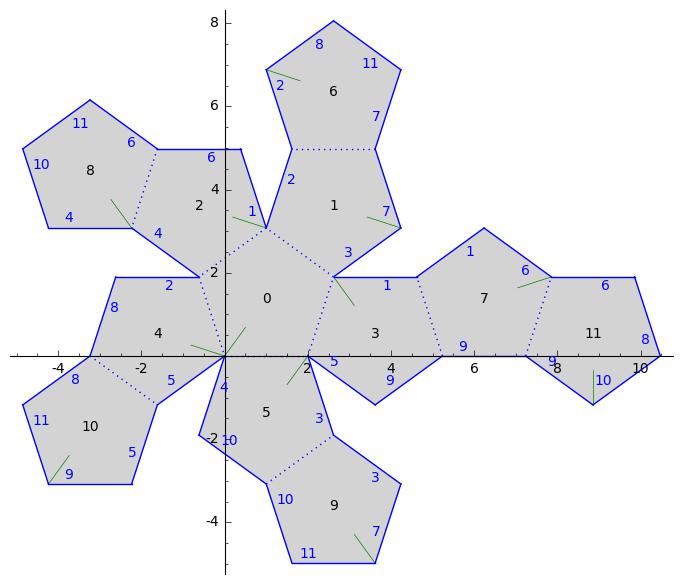

In [14]:
show(gs.plot(), axes=True)

I can tell that the point `(3,5)` is in the unfolding, but I can't tell if it is in polygon 1 or 6. The GraphicalSurface `gs` is made out of GraphicalPolygons which we can use to deal with this sort of thing.

In [15]:
gs.graphical_polygon(1).contains((3,5))

False

In [16]:
gs.graphical_polygon(6).contains((3,5))

True

Great. Now we can get the position of the point on the surface!

In [17]:
gp = gs.graphical_polygon(6)
pt = gp.transform_back((3,5))
pt

(7/2*a^2 + 5/2*a - 11/2, a^3 + 5/2*a^2 - 7/2*a - 15/2)

Here we plot polygon 6 in its geometric coordinates with `pt`.

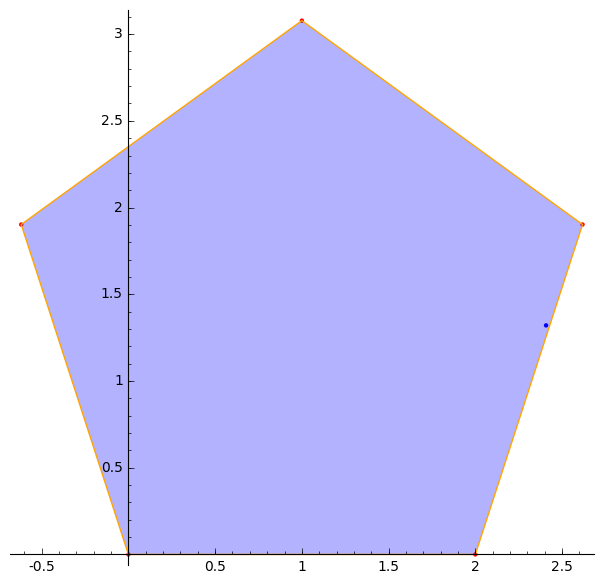

In [18]:
s.polygon(6).plot()+point2d([pt],zorder=100)

Lets convert it to a surface point and plot it!

In [19]:
spt = s.surface_point(6,pt)
spt

Surface point located at (7/2*a^2 + 5/2*a - 11/2, a^3 + 5/2*a^2 - 7/2*a - 15/2) in polygon 6

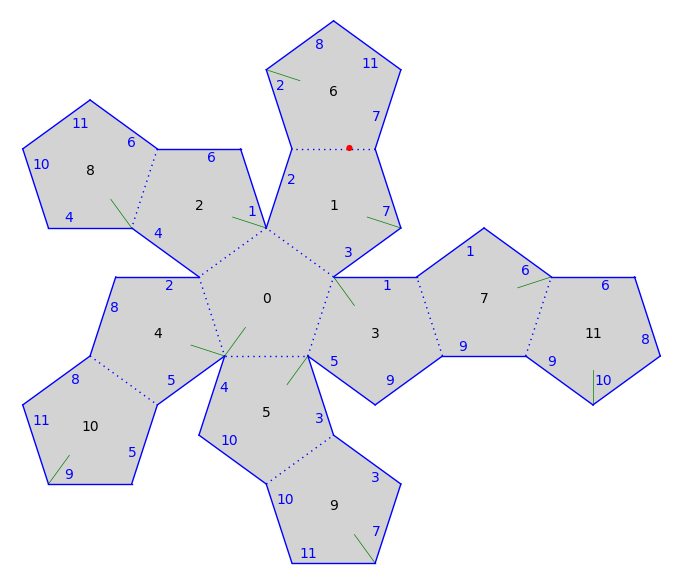

In [20]:
s.plot() + spt.plot(color="red", size=20)

Now I want to plot an upward trajectory through this point. Again, I have to deal with the fact that the coordinates might not match. You can get access to the transformation (a similarity) from geometric coordinates
to graphical coordinates:

In [21]:
transformation = gs.graphical_polygon(6).transformation()
transformation

(x, y) |-> ((1/2*a^2 - 3/2)*x + (1/2*a)*y + 1, (1/2*a)*x + (1/2*a^2 - 3/2)*y + (-a^3))

Really we want the inverse:

In [22]:
inverse_transformation = ~transformation
inverse_transformation

(x, y) |-> ((1/2*a^2 - 3/2)*x + (-1/2*a)*y + (2*a^2 - 1), (-1/2*a)*x + (1/2*a^2 - 3/2)*y + (a^3 - 2*a))

We just want the derivative of this similarity to transform the vertical direction. The derivative is a $2 \times 2$ matrix.

In [23]:
show(inverse_transformation.derivative())

[1/2*a^2 - 3/2         1/2*a]
[       -1/2*a 1/2*a^2 - 3/2]

In [24]:
direction = inverse_transformation.derivative()*vector((0,1))
direction

(1/2*a, 1/2*a^2 - 3/2)

We can use the point and the direction to get a tangent vector, which we convert to a trajectory, flow and plot.

In [25]:
tangent_vector = s.tangent_vector(6, pt, direction)
tangent_vector

SimilaritySurfaceTangentVector in polygon 6 based at (7/2*a^2 + 5/2*a - 11/2, a^3 + 5/2*a^2 - 7/2*a - 15/2) with vector (1/2*a, 1/2*a^2 - 3/2)

In [26]:
traj = tangent_vector.straight_line_trajectory()
traj.flow(100)
traj.is_closed()

True

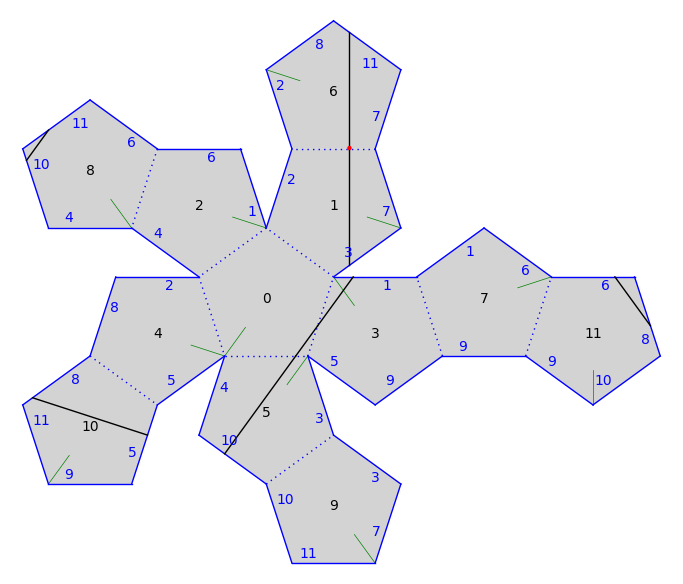

In [27]:
s.plot()+spt.plot(color="red")+traj.plot()

## Multiple graphical surfaces

It is possible to have more than one graphical surface. Maybe you want to have one where things look better.
To get a new suface, you can call `s.graphical_surface()` again but with a `cached=False` parameter.

In [28]:
pretty_gs = s.graphical_surface(polygon_labels=False, edge_labels=False, cached=False)

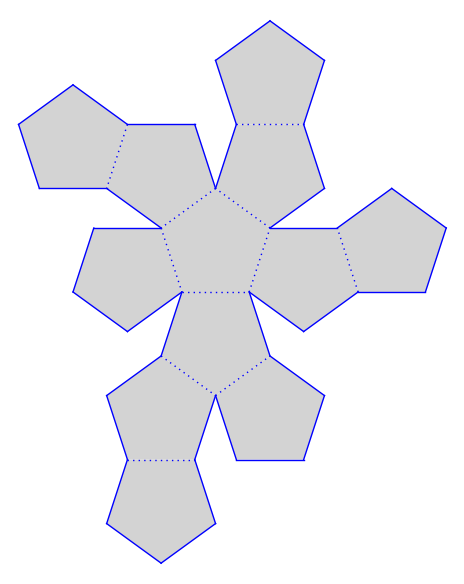

In [29]:
pretty_gs.plot()

Current polygon printing options:

In [30]:
pretty_gs.polygon_options

{'color': 'lightgray'}

In [31]:
del pretty_gs.polygon_options["color"]
pretty_gs.polygon_options["rgbcolor"]="#ffeeee"

In [32]:
pretty_gs.non_adjacent_edge_options["thickness"] = 0.5
pretty_gs.non_adjacent_edge_options["color"] = "lightblue"
pretty_gs.will_plot_adjacent_edges = False

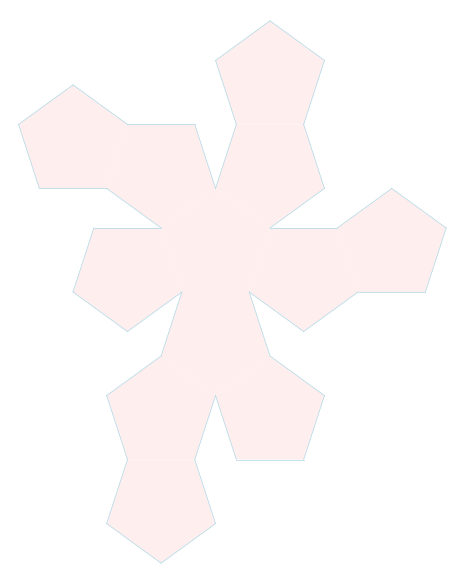

In [33]:
pretty_gs.plot()

To use a non-default graphical surface you need to pass the graphical surface as a parameter.

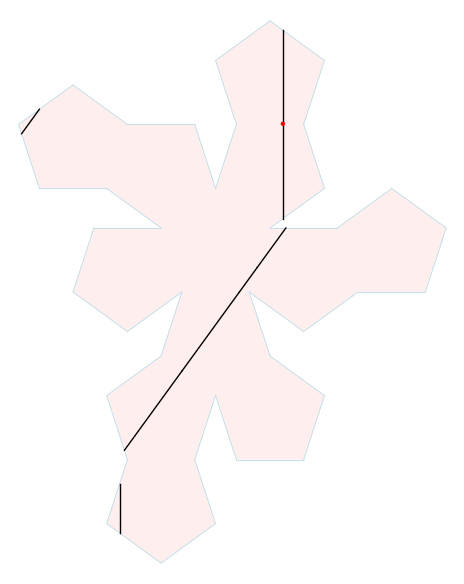

In [34]:
pretty_gs.plot()+spt.plot(pretty_gs, color="red")+traj.plot(pretty_gs)

Lets make it prettier by drawing some stars on the faces!

Find all saddle connections of length at most $\sqrt{16}$:

In [35]:
saddle_connections = s.saddle_connections(16)

The edges have length two so we will keep anything that has a different length.

In [36]:
saddle_connections2 = []
for sc in saddle_connections:
    h = sc.holonomy()
    if h[0]**2 + h[1]**2 != 4:
        saddle_connections2.append(sc)
len(saddle_connections2)

120

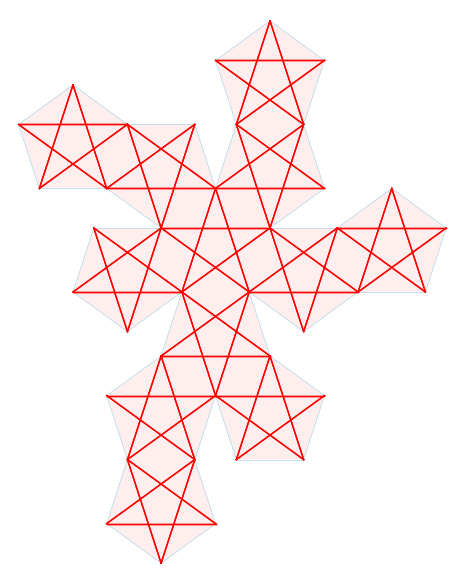

In [37]:
plot = pretty_gs.plot()
for sc in saddle_connections2:
    plot += sc.plot(pretty_gs, color="red")
plot

Plot using the original graphical surface.

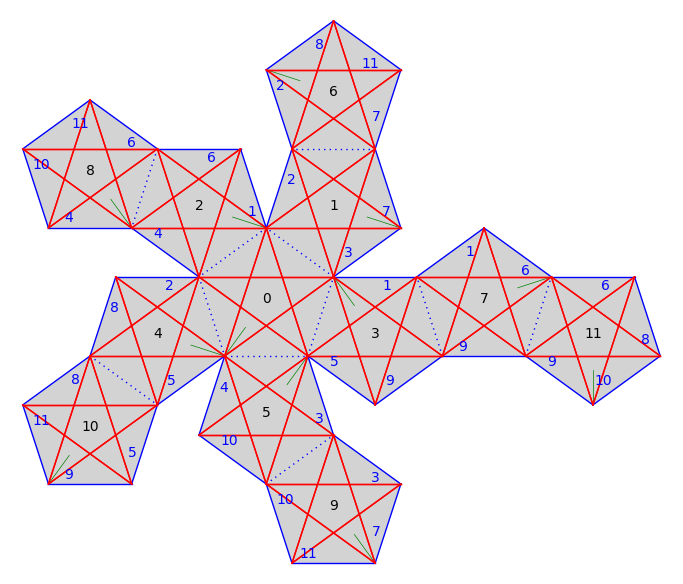

In [38]:
plot = s.plot()
for sc in saddle_connections2:
    plot += sc.plot(color="red")
plot

## Manipulating edge labels

In [79]:
s = translation_surfaces.arnoux_yoccoz(4)

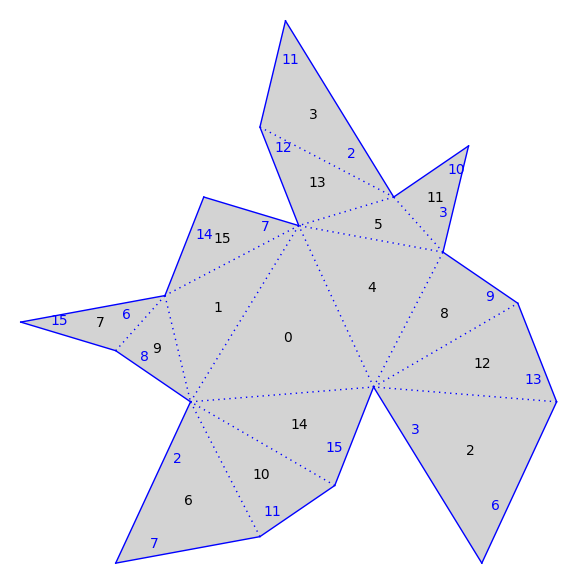

In [80]:
s.plot()

Here is an example with the edge labels centered on the edge.

In [81]:
gs = s.graphical_surface(cached=False)

In [82]:
del gs.polygon_options["color"]
gs.polygon_options["rgbcolor"]="#eee"
gs.edge_label_options["position"]="edge"
gs.edge_label_options["t"]=0.5
gs.edge_label_options["push_off"]=0
gs.edge_label_options["color"]="green"
gs.adjacent_edge_options["thickness"]=0.5
gs.will_plot_non_adjacent_edges=False

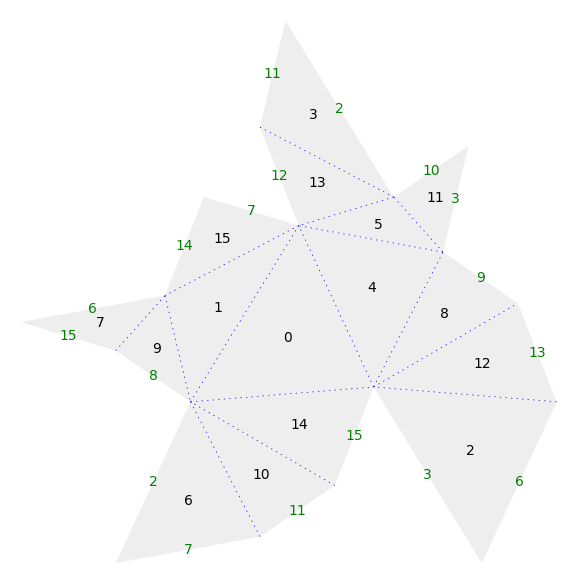

In [83]:
gs.plot()

In [103]:
gs = s.graphical_surface(cached=False)

In [104]:
del gs.polygon_options["color"]
gs.polygon_options["rgbcolor"]="#eef"
gs.edge_label_options["position"]="outside"
gs.edge_label_options["t"]=0.5
gs.edge_label_options["push_off"]=0.02
gs.edge_label_options["color"]="green"
gs.adjacent_edge_options["thickness"]=0.5
gs.non_adjacent_edge_options["thickness"]=0.25

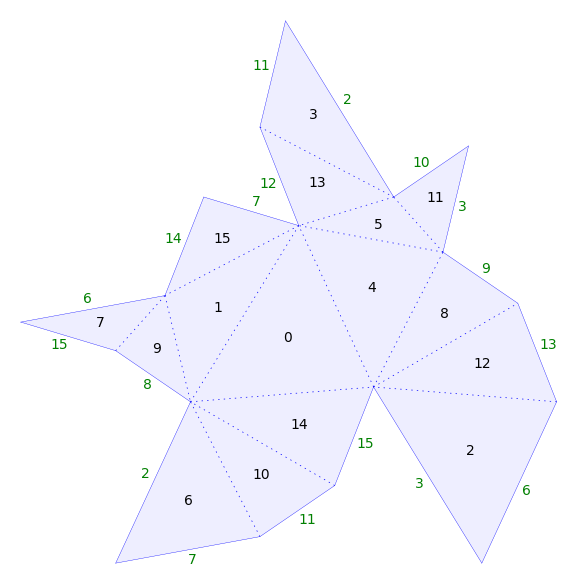

In [105]:
gs.plot()

## Hacking GraphicalSurface

In [45]:
s = translation_surfaces.infinite_staircase()

In [46]:
gs = s.graphical_surface(polygon_labels=False, edge_labels=False)

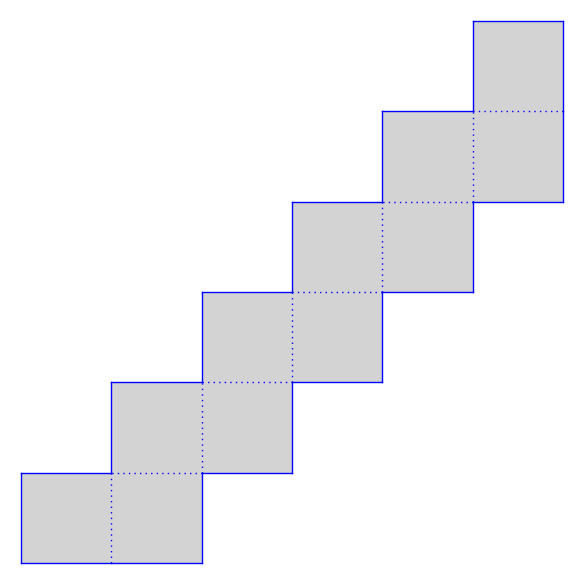

In [47]:
gs.plot()

The methods `plot_polygon`, `plot_polygon_label`, `plot_edge`, `plot_edge_label`, `plot_zero_flag` are fairly
simple. They just call methods in a GraphicalPolygon which was passed as a parameter. We can replace any of these functions to customize their behaviour.

In [48]:
# Define a replacement method.
def plot_polygon(self, label, graphical_polygon, upside_down):
    if label%2==0:
        return graphical_polygon.plot_polygon(color="lightgreen")
    else:
        return graphical_polygon.plot_polygon(color="yellow")        

In [49]:
# Replace the method in gs.
from types import MethodType
gs.plot_polygon = MethodType(plot_polygon, gs)

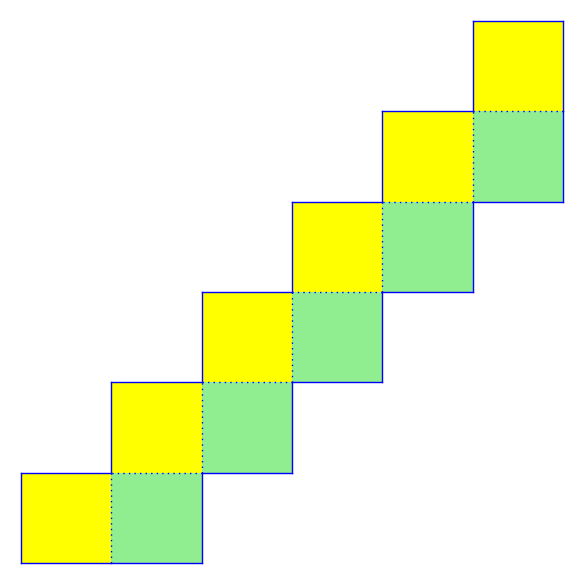

In [50]:
gs.plot()